<a href="https://colab.research.google.com/github/kh-ops69/ML_NLP/blob/master/topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-06-16 14:06:34--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  6.67MB/s    in 0.7s    

2023-06-16 14:06:36 (6.67 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [2]:
import nltk
import textwrap
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stopw = set(stopwords.words('english'))

In [5]:
df = pd.read_csv('bbc_text_cls.csv')
df.sample(5)

,text,labels
119,Nigeria to boost cocoa production\n\nThe gover...,business
1839,Global blogger action day called\n\nThe global...,tech
2096,US state acts to stop 'spammers'\n\nUS state T...,tech
1042,Labour accused of broken pledge\n\nLabour has ...,politics
1718,Fuming Robinson blasts officials\n\nEngland co...,sport


In [6]:
stopw = stopw.union({ 'said', 'would', 'could', 'told', 'also', 'one', 'two',
    'mr', 'new', 'year'})
stopw = list(stopw)

In [7]:
counter = CountVectorizer(stop_words=stopw)

In [8]:
x = counter.fit_transform(df.text)

In [9]:
lda = LatentDirichletAllocation(n_components = 10, random_state=81828)

In [10]:
lda.fit(x)

LatentDirichletAllocation(random_state=81828)

In [22]:
def get_topic_words(feature_names, model, top_words = 10):
  figure, axes = plt.subplots(2,5, figsize=(30,15), sharex=True)            # making the subplot and setting number of rows for whole subplot to 2 and columns 5
                   # sharex is to share the x axis among multiple column graphs
  axes = axes.flatten()
  for topic_id, topic in enumerate(model.components_):
    topic_word_idx = topic.argsort()[:-top_words-1:-1]
    words = [feature_names[i] for i in topic_word_idx]
    weight_probs = topic[topic_word_idx]

    ax = axes[topic_id]
    ax.barh(words, weight_probs, height=0.7)
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=30)
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    figure.suptitle('LDA/NMF results', fontsize=50)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

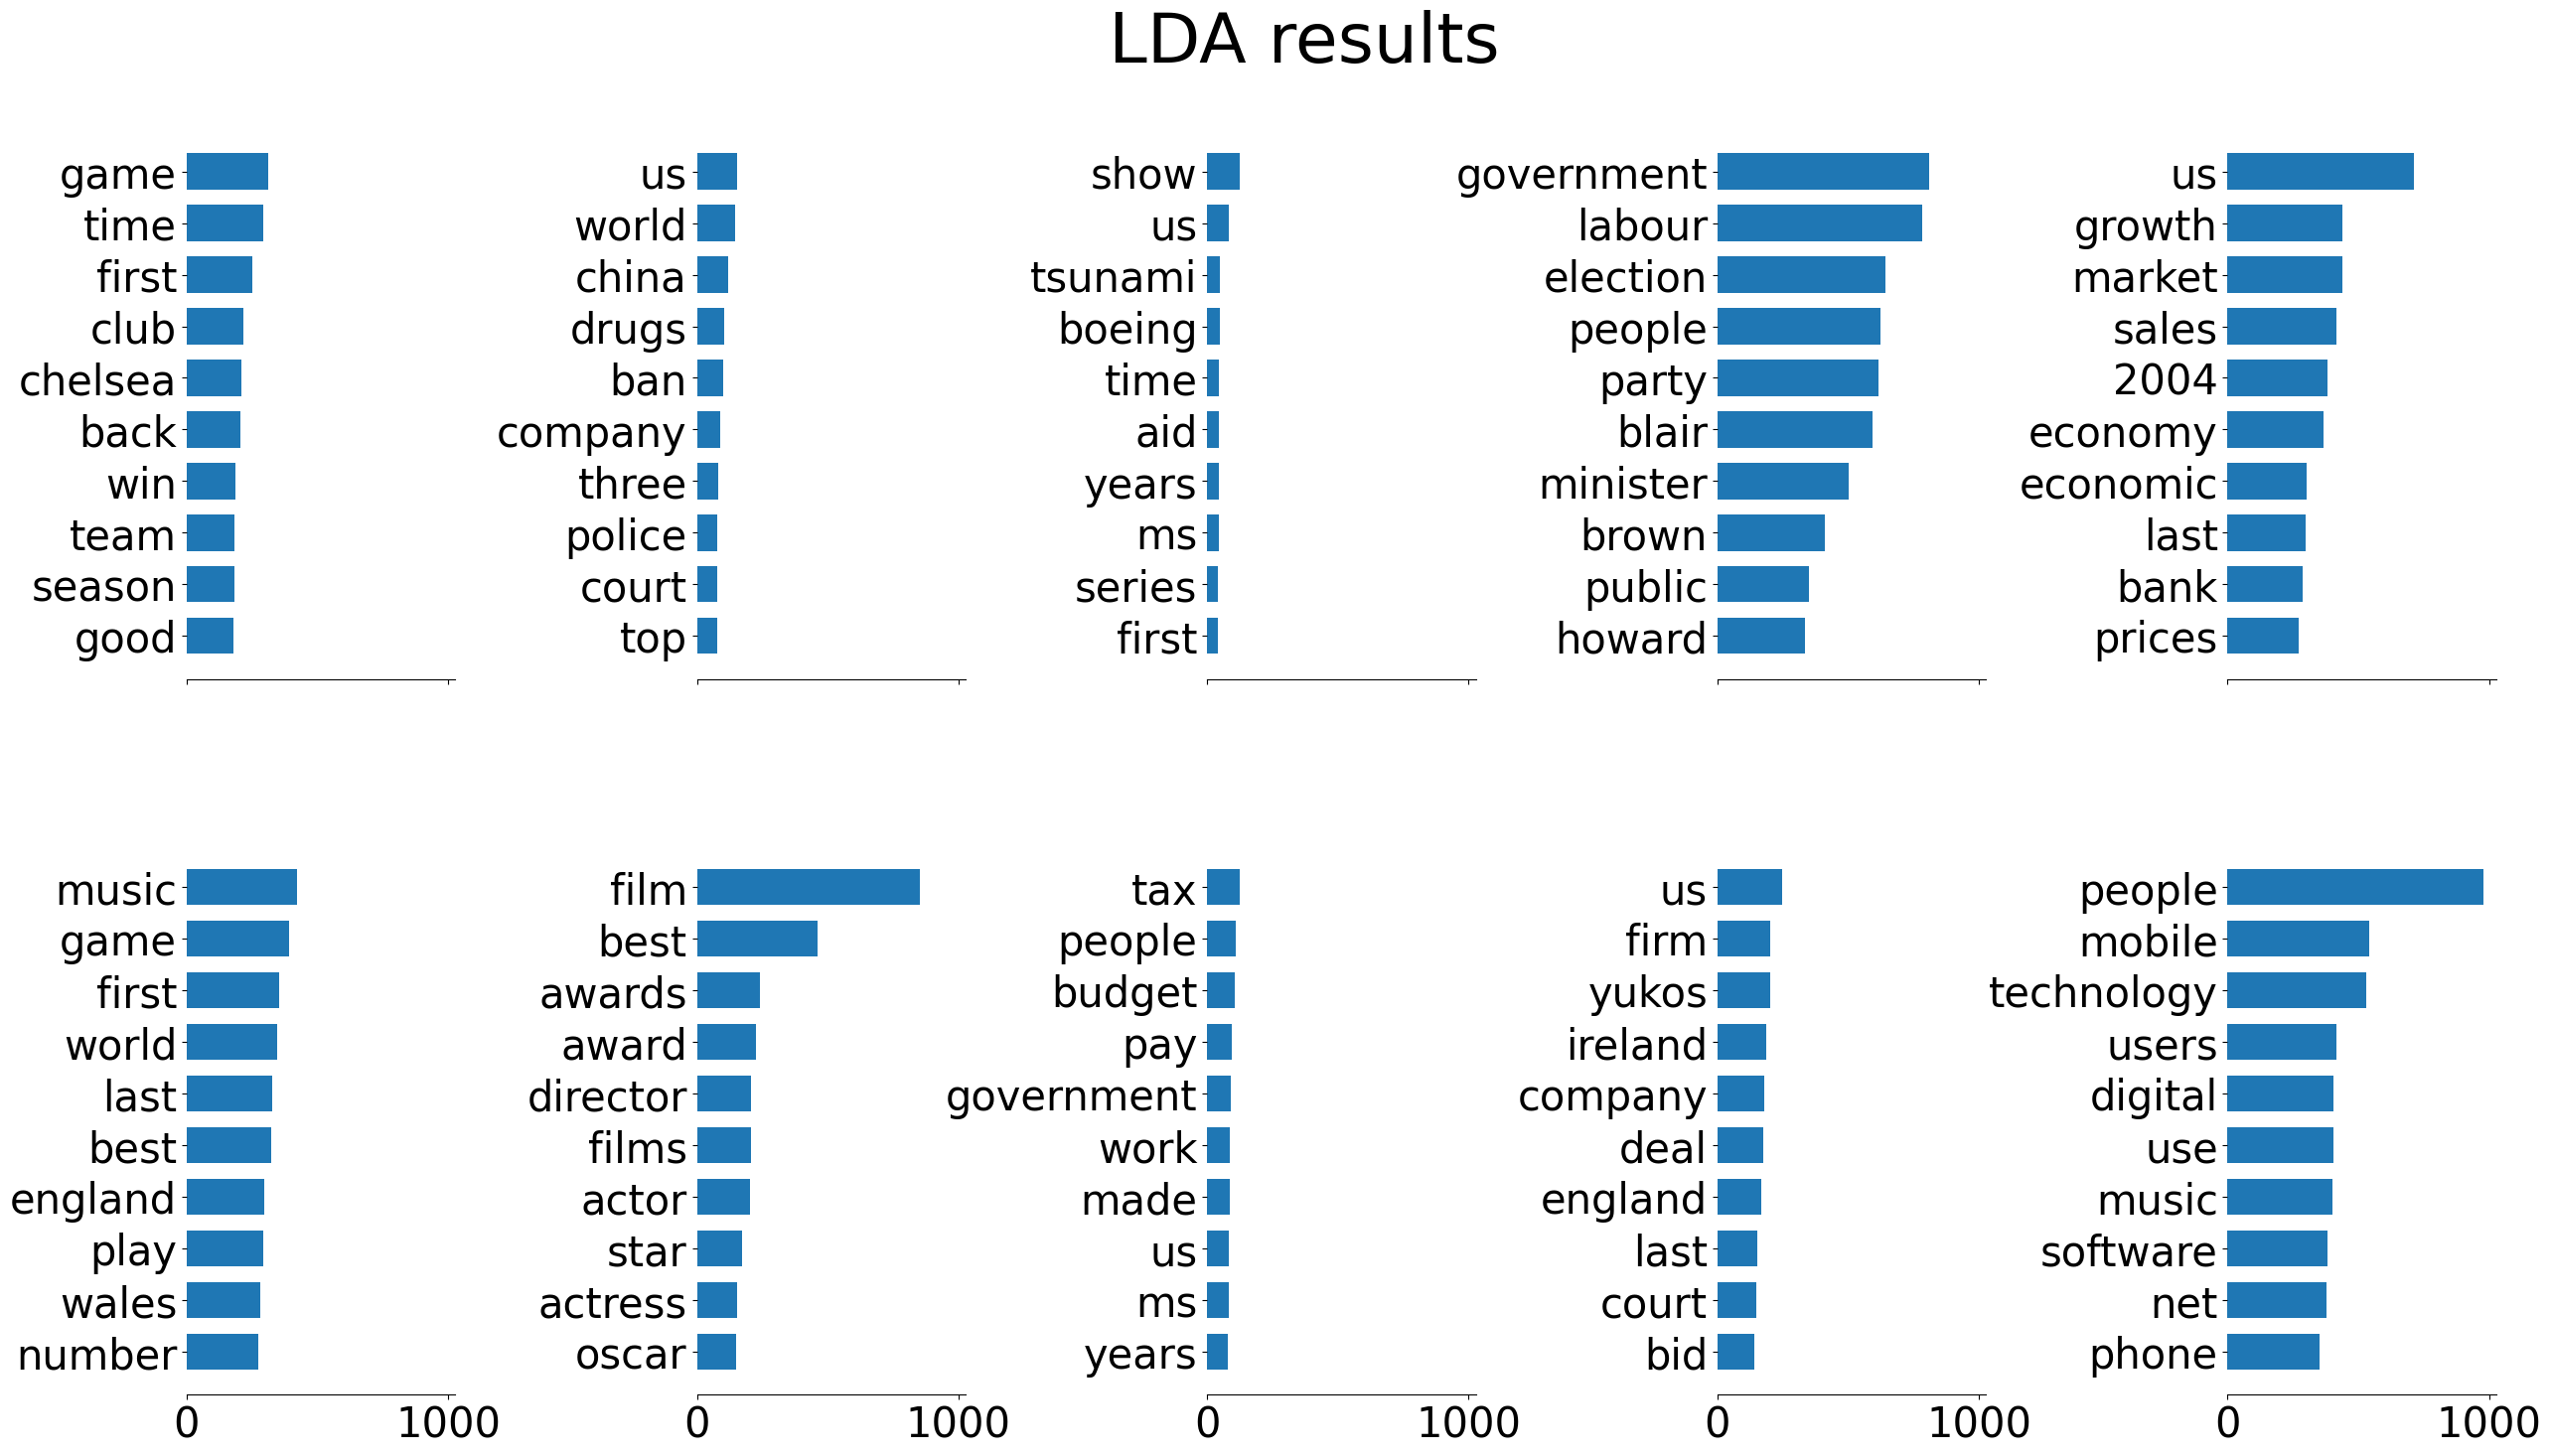

In [12]:
features = counter.get_feature_names_out()
get_topic_words(features, lda)

In [13]:
z = lda.transform(x)

Text(0.5, 0, 'sport')

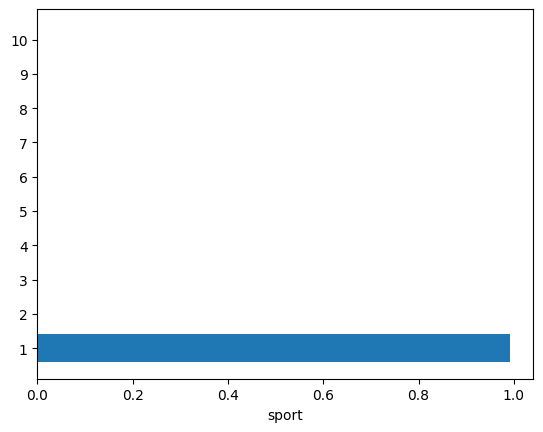

In [17]:
# np.random.seed(0) if user wants same results again and again
i = np.random.choice(len(df))
topic = z[i]
topics = np.arange(10)+1     # topics needs to be 10 because n_components is also
                             # set to 10

fig, ax = plt.subplots()
ax.barh(topics, topic)
ax.set_yticks(topics)
ax.set_xlabel(df.iloc[i].labels)

as we can see this sport label is related to the football article below

In [18]:
def wrap(text):
  return textwrap.fill(text, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i].text))

Ferguson rues failure to cut gap

Boss Sir Alex Ferguson was left
ruing Manchester United's failure to close the gap on Chelsea, Everton
and Arsenal after his side's 1-1 draw with Fulham.

Premiership
leaders Chelsea and the Gunners endured a 2-2 stalemate on Sunday,
giving United the chance to make up some ground in the league.  But
Ferguson said: "I think what makes it so bad is that both our rivals
dropped points at the weekend.  "It was a great opportunity - and we
haven't delivered."  United went ahead through Alan Smith in the 33rd
minute before Bouba Diop's superb 25-yard strike cancelled out the
visitors' lead in the 87th minute.  Ferguson described the result as
an "absolute giveaway" after United had earlier missed a host of
opportunities to finish off the encounter.  He said: "It was a good
performance - some of the football was fantastic - but we just didn't
finish them off.  "In fairness, it's a fantastic strike from the
Fulham player."  The result leaves Ferguson's side f



---



---



---



---



---



---



Same thing can be achieved using NNMF (Non Negative Matrix Factorization)

In [19]:
nmf_model = NMF(n_components=10, random_state=21827, beta_loss='kullback-leibler', solver='mu')

In [20]:
nmf_model.fit(x)

NMF(beta_loss='kullback-leibler', n_components=10, random_state=21827,
    solver='mu')

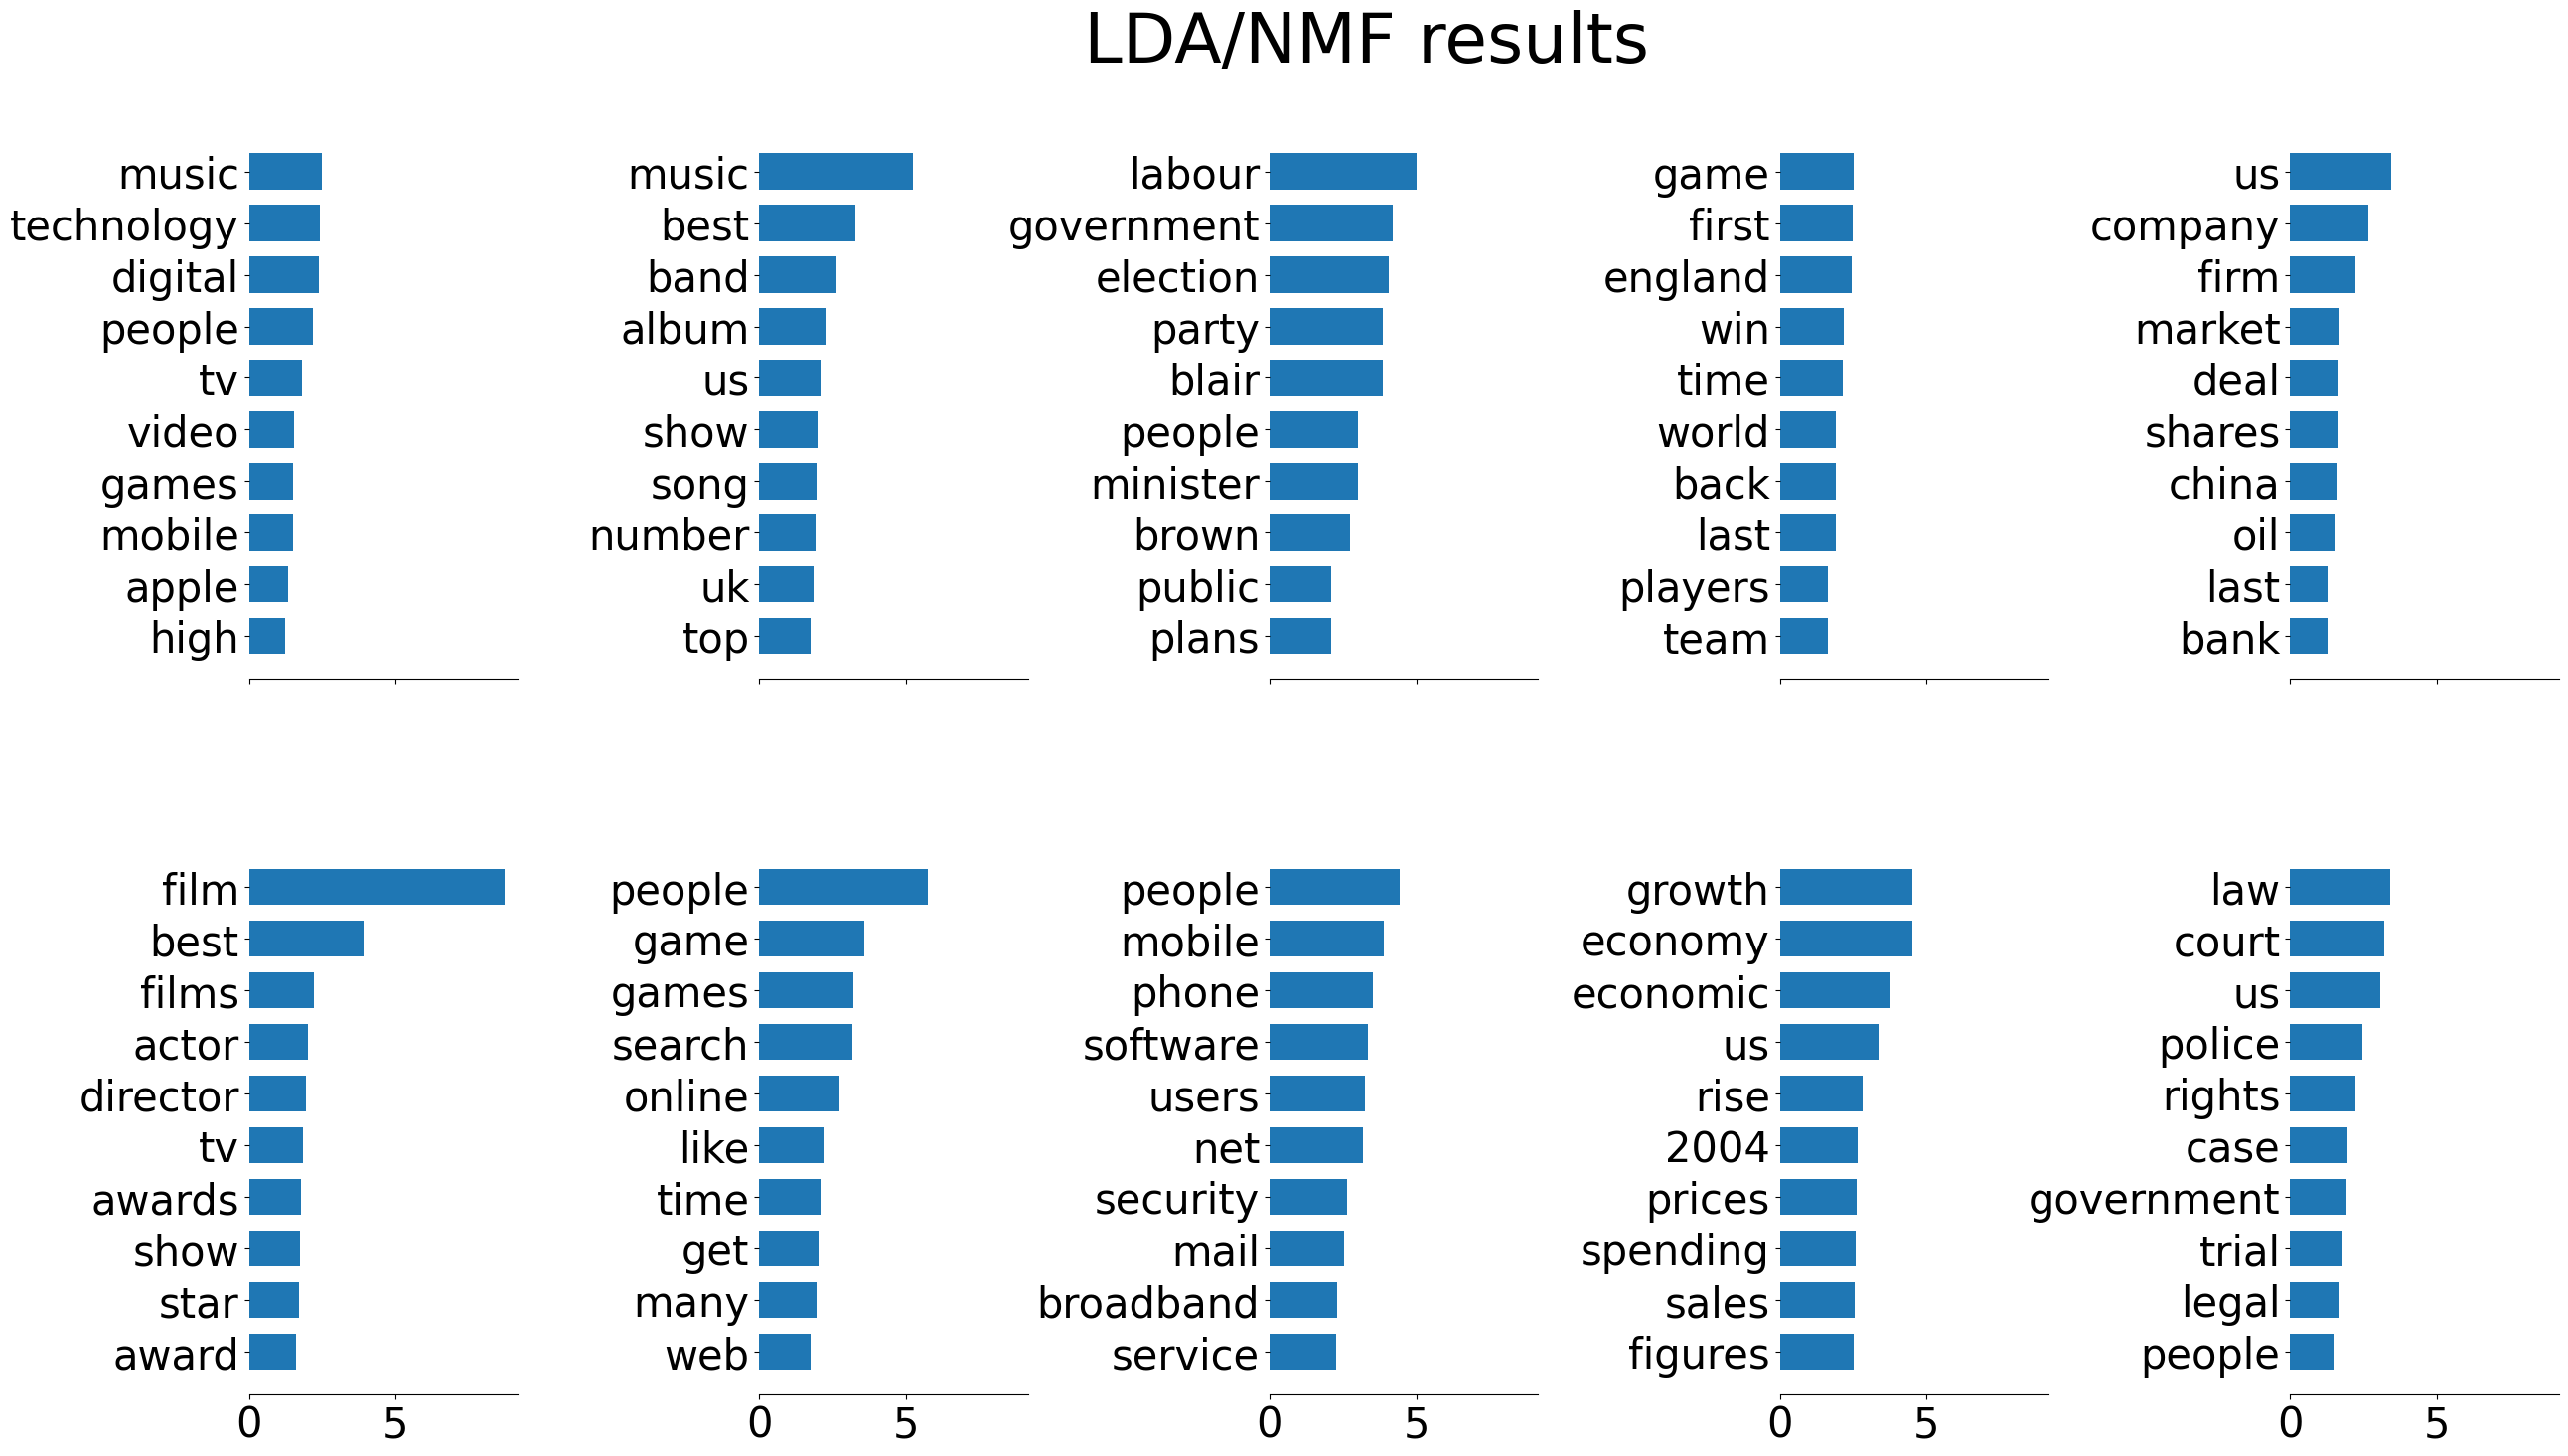

In [23]:
get_topic_words(features, nmf_model)

In [24]:
zz = nmf_model.transform(x)

Text(0.5, 0, 'tech')

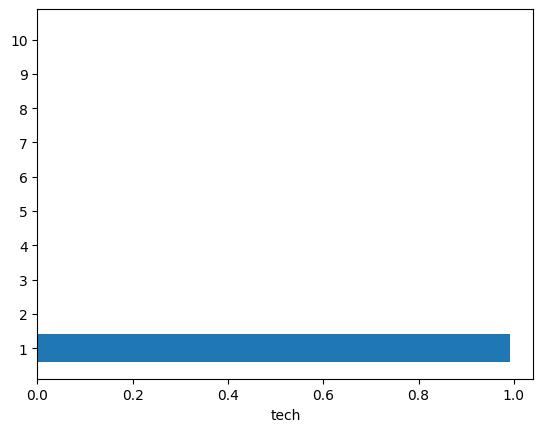

In [32]:
ii = np.random.choice(len(df))
ZZ = zz[ii]
topics= np.arange(10)+1

figg, bx = plt.subplots()
bx.barh(topics, topic)
bx.set_yticks(topics)
bx.set_xlabel(df.iloc[ii].labels)

as we can again observe here, the tech label is related to piracy issue in technology sector in the USA

In [33]:
print(wrap(df.iloc[ii].text))

US peer-to-peer pirates convicted

The first convictions for piracy
over peer-to-peer networks have been handed down in the US.

New
Yorker William Trowbridge and Texan Michael Chicoine have pleaded
guilty to charges that they infringed copyright by illegally sharing
music, movies and software.  The two men faced charges following raids
in August on suspected pirates by the FBI. The pair face jail terms of
up to five years and a $250,000 (£130,000) fine.

In a statement the
US Department of Justice said the two men operated the central hubs in
a piracy community organised across the Direct Connect peer-to-peer
network.  The piracy group called itself the Underground Network and
membership of it demanded that users share between one and 100
gigabytes of files.  Direct Connect allows users to set themselves up
as central servers that act as co-ordinating spots for sharers.  Users
would swap files, such as films and music, by exchanging data over the
network.  During its investigation FBI